In [14]:
import Pkg
Pkg.activate("../AR")

  Activating project at `c:\Users\goninarn\Desktop\Stage\AR`


In [15]:
include("../AR/utils/utils.jl")
include("../AR/utils/Structure.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")
include("PhenoPlot.jl")
cd(@__DIR__)
commonpath = "../mystations/"

"../mystations/"

TN temperatures and dates

In [16]:
TN_temp_Montpellier = initTN(commonpath * "TN_Montpellier.txt")
TN_temp_Bonn = initTN(commonpath * "TN_Bonn.txt")
TN_temp_Nantes = initTN(commonpath * "TN_Nantes.txt")

TN_vecs = [TN_temp_Montpellier.df.TN, TN_temp_Bonn.df.TN, TN_temp_Nantes.df.TN]
dates_vecs_TN = [TN_temp_Montpellier.df.DATE, TN_temp_Bonn.df.DATE, TN_temp_Nantes.df.DATE]

3-element Vector{Vector{Date}}:
 [Date("1946-01-01"), Date("1946-01-02"), Date("1946-01-03"), Date("1946-01-04"), Date("1946-01-05"), Date("1946-01-06"), Date("1946-01-07"), Date("1946-01-08"), Date("1946-01-09"), Date("1946-01-10")  …  Date("2022-12-22"), Date("2022-12-23"), Date("2022-12-24"), Date("2022-12-25"), Date("2022-12-26"), Date("2022-12-27"), Date("2022-12-28"), Date("2022-12-29"), Date("2022-12-30"), Date("2022-12-31")]
 [Date("1976-11-01"), Date("1976-11-02"), Date("1976-11-03"), Date("1976-11-04"), Date("1976-11-05"), Date("1976-11-06"), Date("1976-11-07"), Date("1976-11-08"), Date("1976-11-09"), Date("1976-11-10")  …  Date("2025-02-19"), Date("2025-02-20"), Date("2025-02-21"), Date("2025-02-22"), Date("2025-02-23"), Date("2025-02-24"), Date("2025-02-25"), Date("2025-02-26"), Date("2025-02-27"), Date("2025-02-28")]
 [Date("1992-01-01"), Date("1992-01-02"), Date("1992-01-03"), Date("1992-01-04"), Date("1992-01-05"), Date("1992-01-06"), Date("1992-01-07"), Date("1992-01-08

## Generated data on grapevine model

Phenology of grapevine with generated data from a model trained on Montpellier records

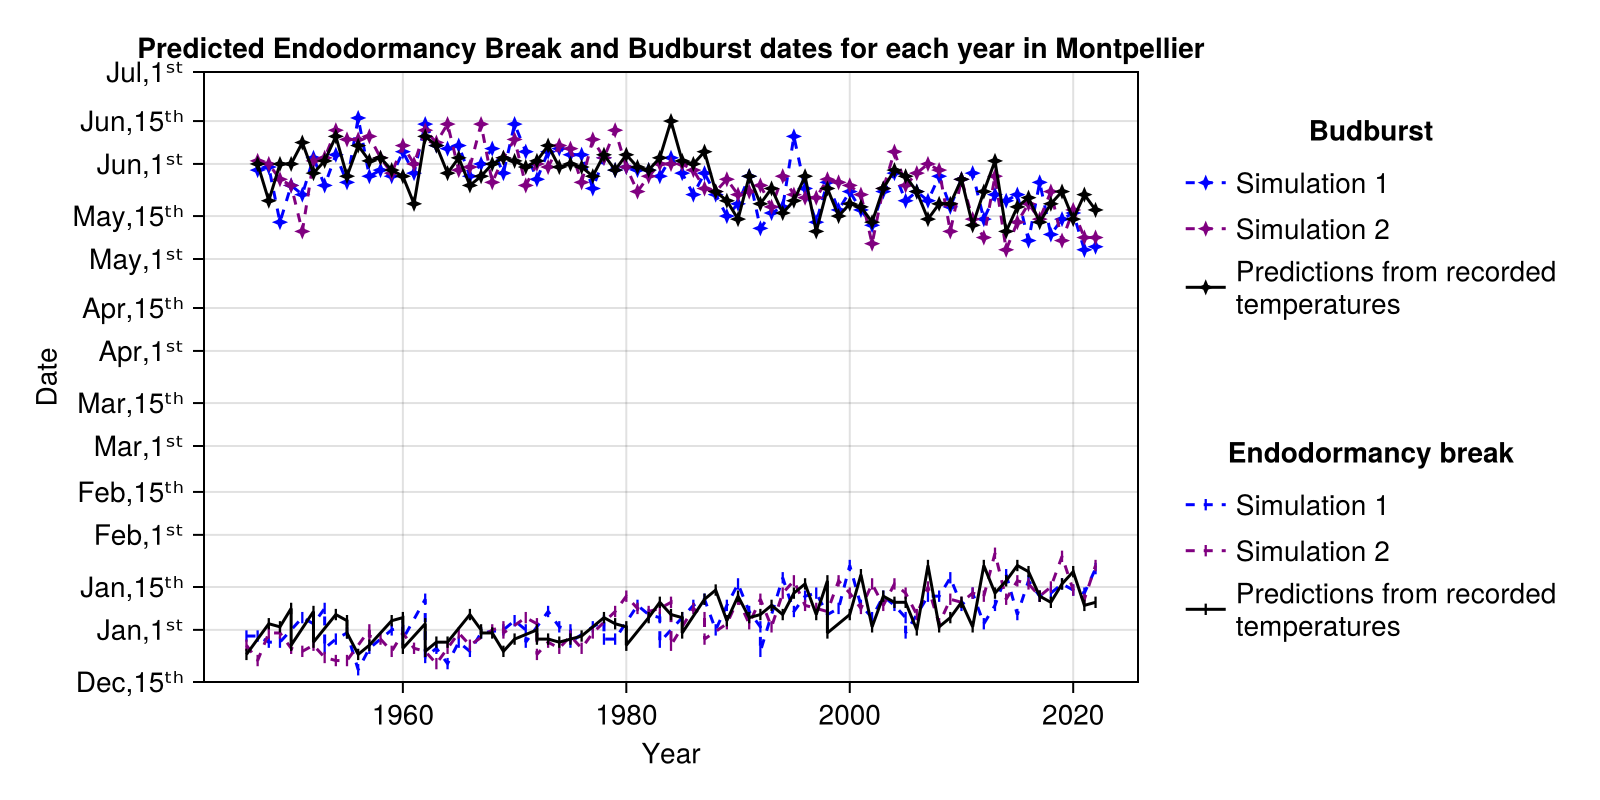

CairoMakie.Screen{IMAGE}


In [17]:
include("../AR/utils/Structure.jl")
include("PhenoPred.jl")
cd(@__DIR__)
DB_Montpellier, BB_Montpellier = Vine_Phenology_Pred(commonpath * "TN_Montpellier.txt", commonpath * "TX_Montpellier.txt")

ARmodel = load_model("model_MontpellierTN_TX_p6_k5.jld2")
date_vec = ARmodel.date_vec
x_vec = rand(ARmodel, 2, date_vec)

Tab = [Vine_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack

colors = ["blue", "purple", "black"]
fig = Plot_Pheno_Dates_DB_BB([Tab[1, :]; [DB_Montpellier]],
    [Tab[2, :]; [BB_Montpellier]],
    (8, 1),
    DB_label=[["Simulation $(i)" for i in 1:2]; "Predictions from recorded\ntemperatures"],
    DB_colors=colors,
    BB_label=[["Simulation $(i)" for i in 1:2]; "Predictions from recorded\ntemperatures"],
    BB_colors=colors,
    dashindexes=[1, 2], 
    comments = "in Montpellier")
save("Presentation/GrapeSim/G3phenos.pdf", fig, ; px_per_unit=2.0)
display(fig)

Montpellier

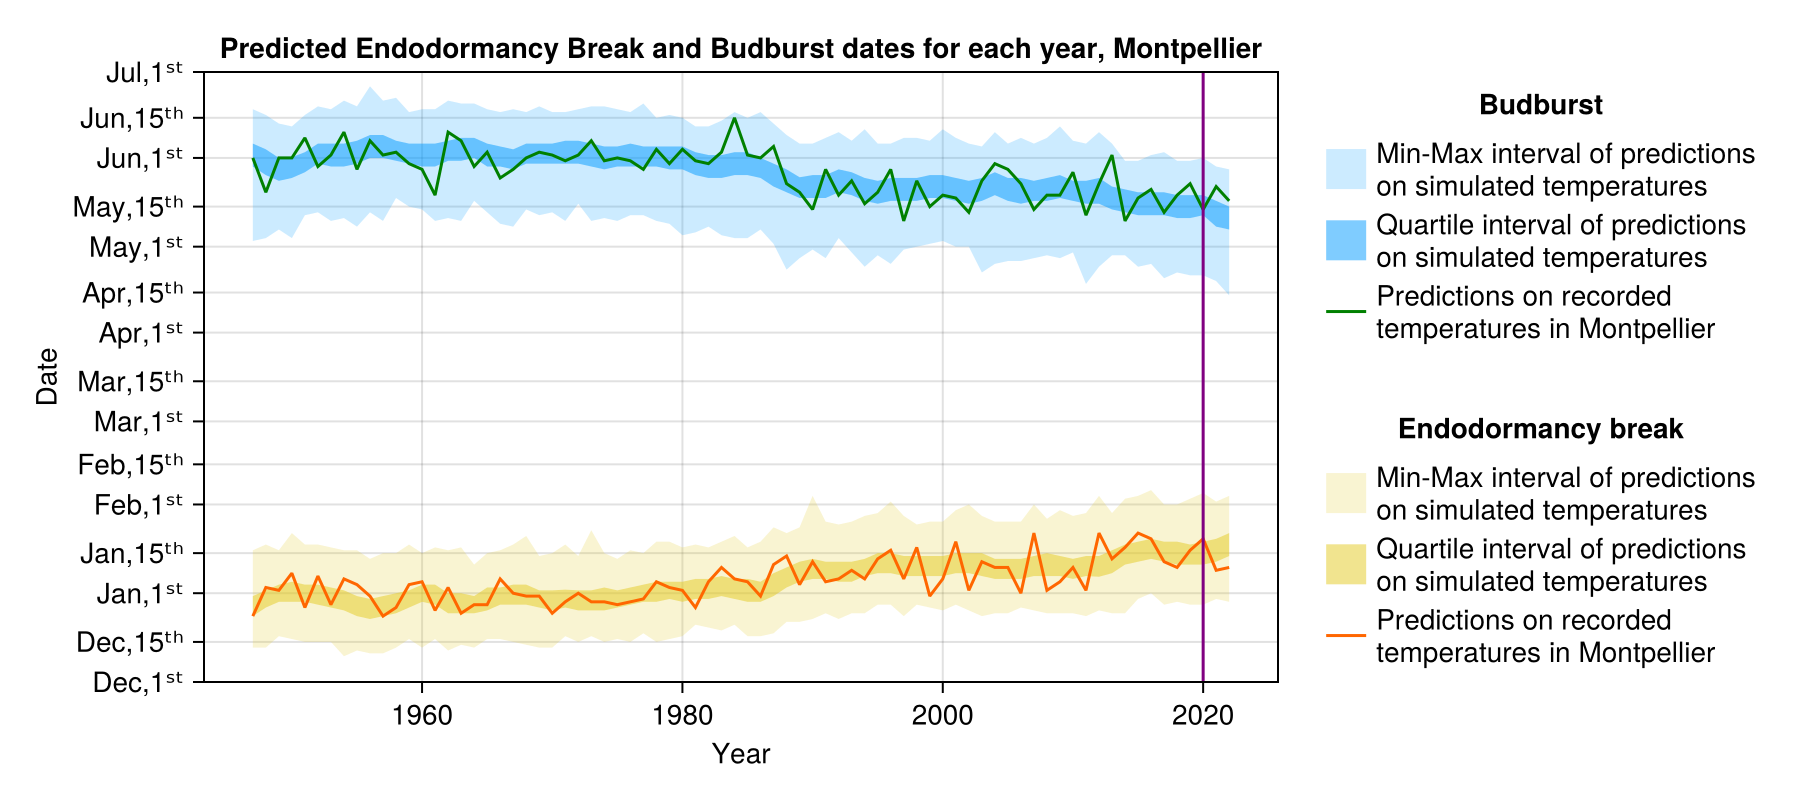

CairoMakie.Screen{PDF}


In [18]:
include("PhenoPlot.jl")
include("../AR/utils/Structure.jl")
cd(@__DIR__)

DB_Montpellier, BB_Montpellier = Vine_Phenology_Pred(commonpath * "TN_Montpellier.txt", commonpath * "TX_Montpellier.txt")

ARmodel = load_model("model_MontpellierTN_TX_p6_k5.jld2")
date_vec = ARmodel.date_vec
x_vec = rand(ARmodel, 1000, date_vec)

Tab = [Vine_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]


fig = Plot_Pheno_Dates_DB_BB(DB_Montpellier, BB_Montpellier, (8, 1),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Montpellier",
    YearCut=2020
)
display(fig)
save("Presentation/GrapeSim/GMontpellier_sim.pdf", fig, ; px_per_unit=2.0)

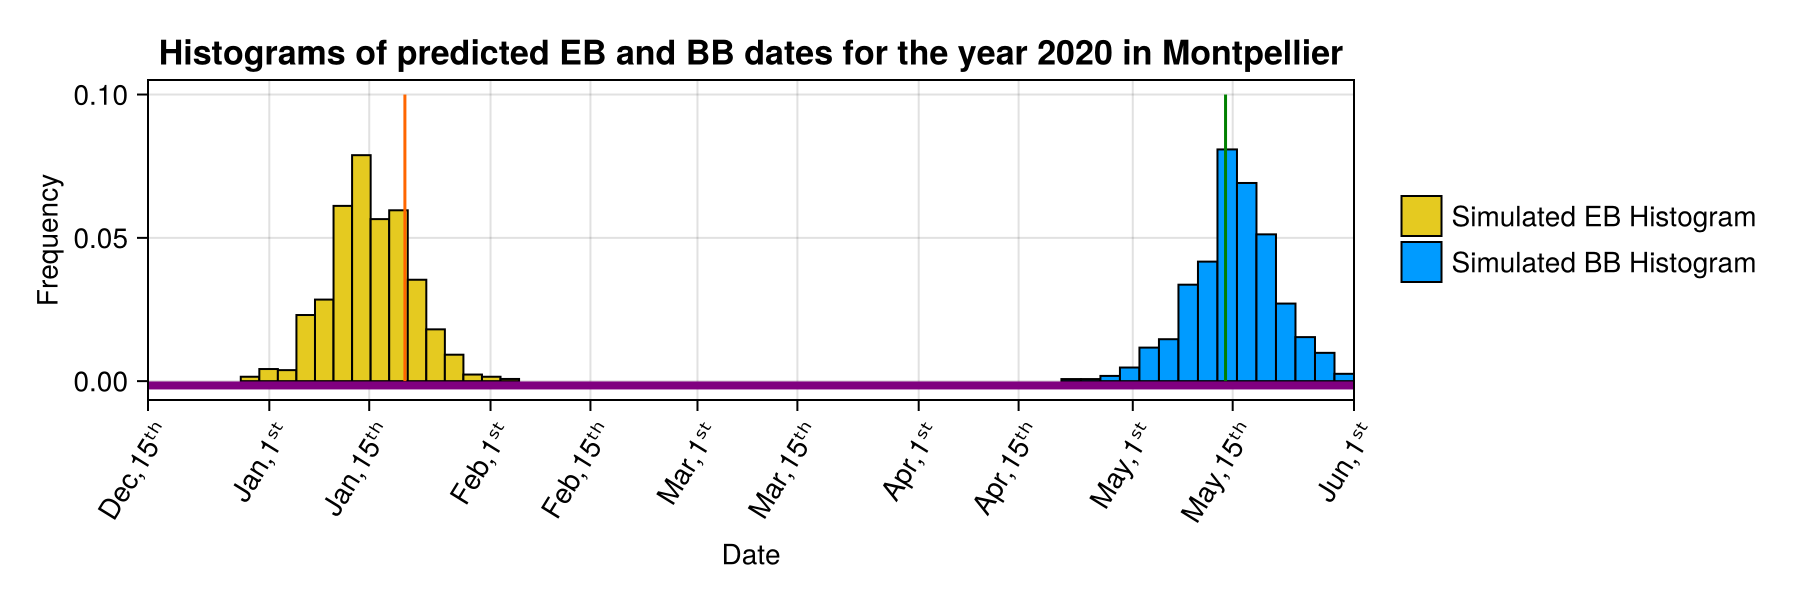

CairoMakie.Screen{PDF}


In [19]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Montpellier, BB_Montpellier, (8, 1), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Montpellier",
    LineHeight=0.1
)
display(fig)
save("Presentation/GrapeSim/GMontpellier2020.pdf", fig, ; px_per_unit=2.0)

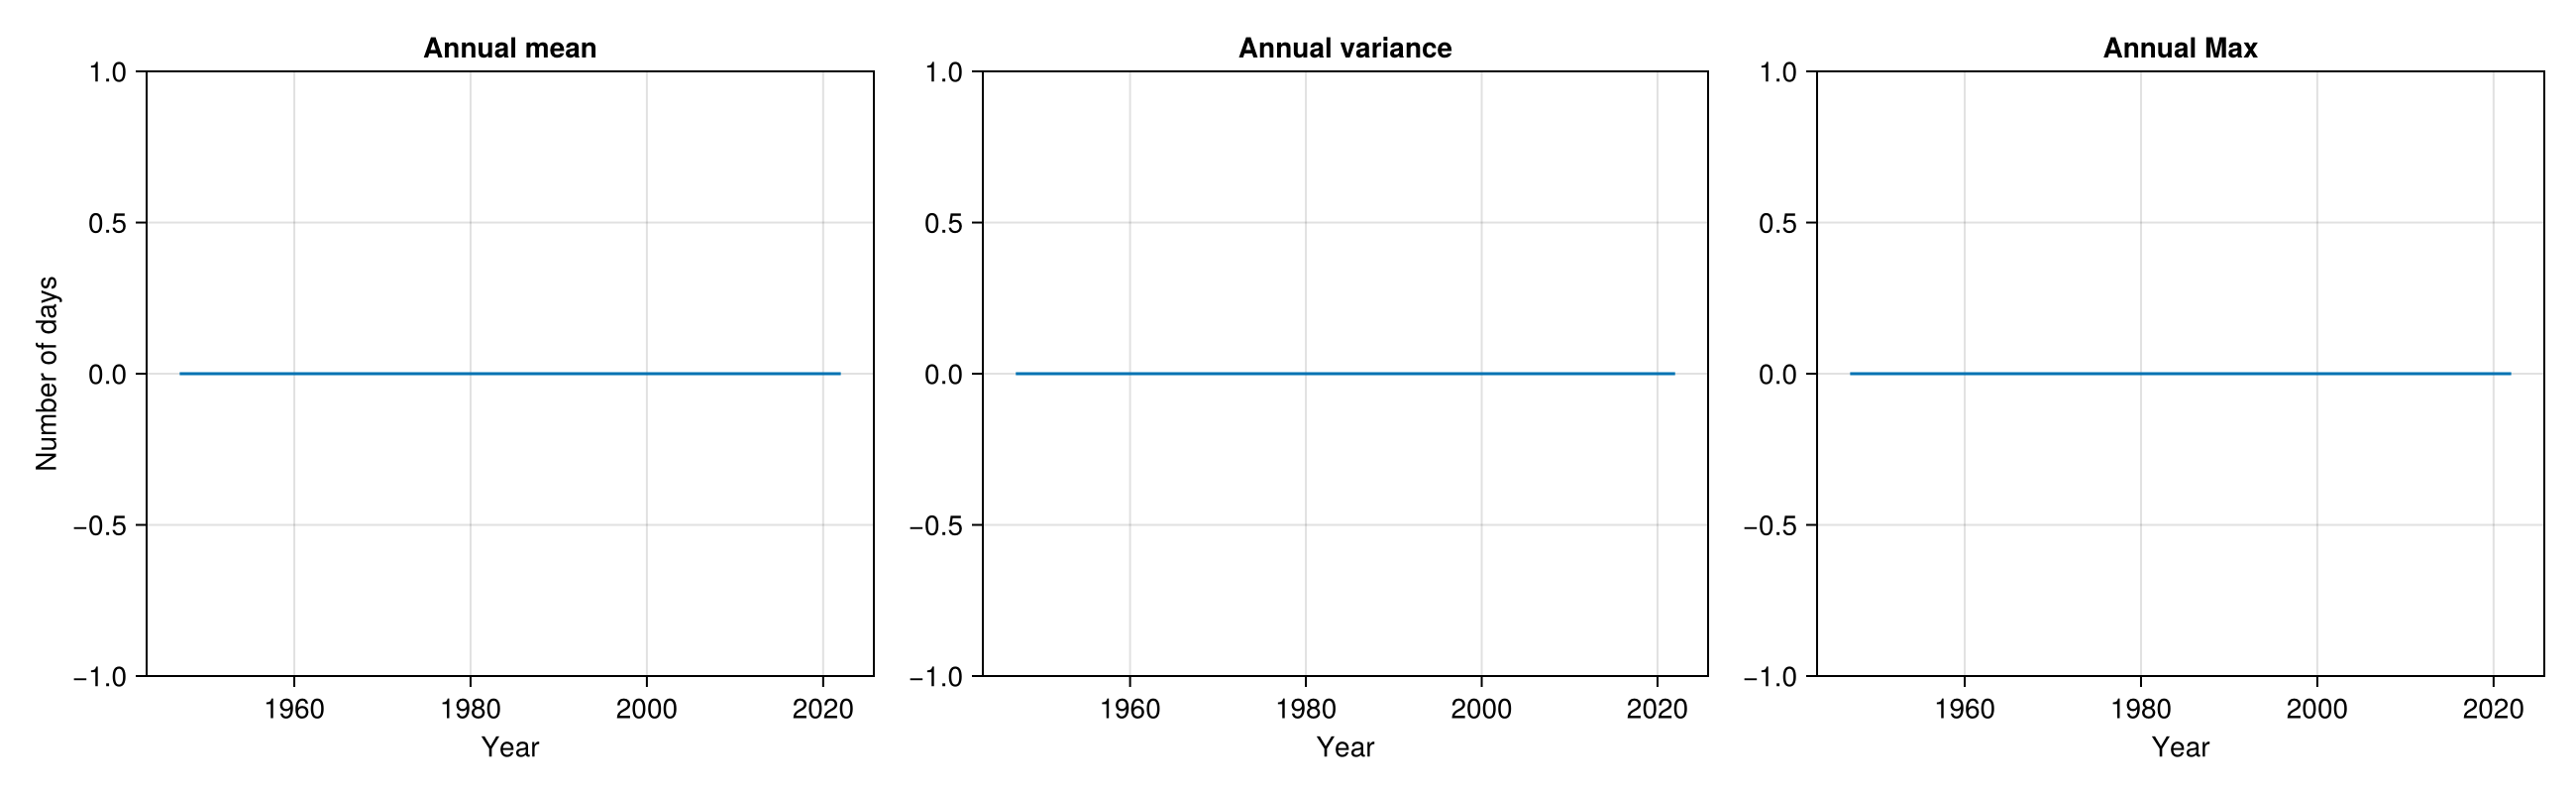

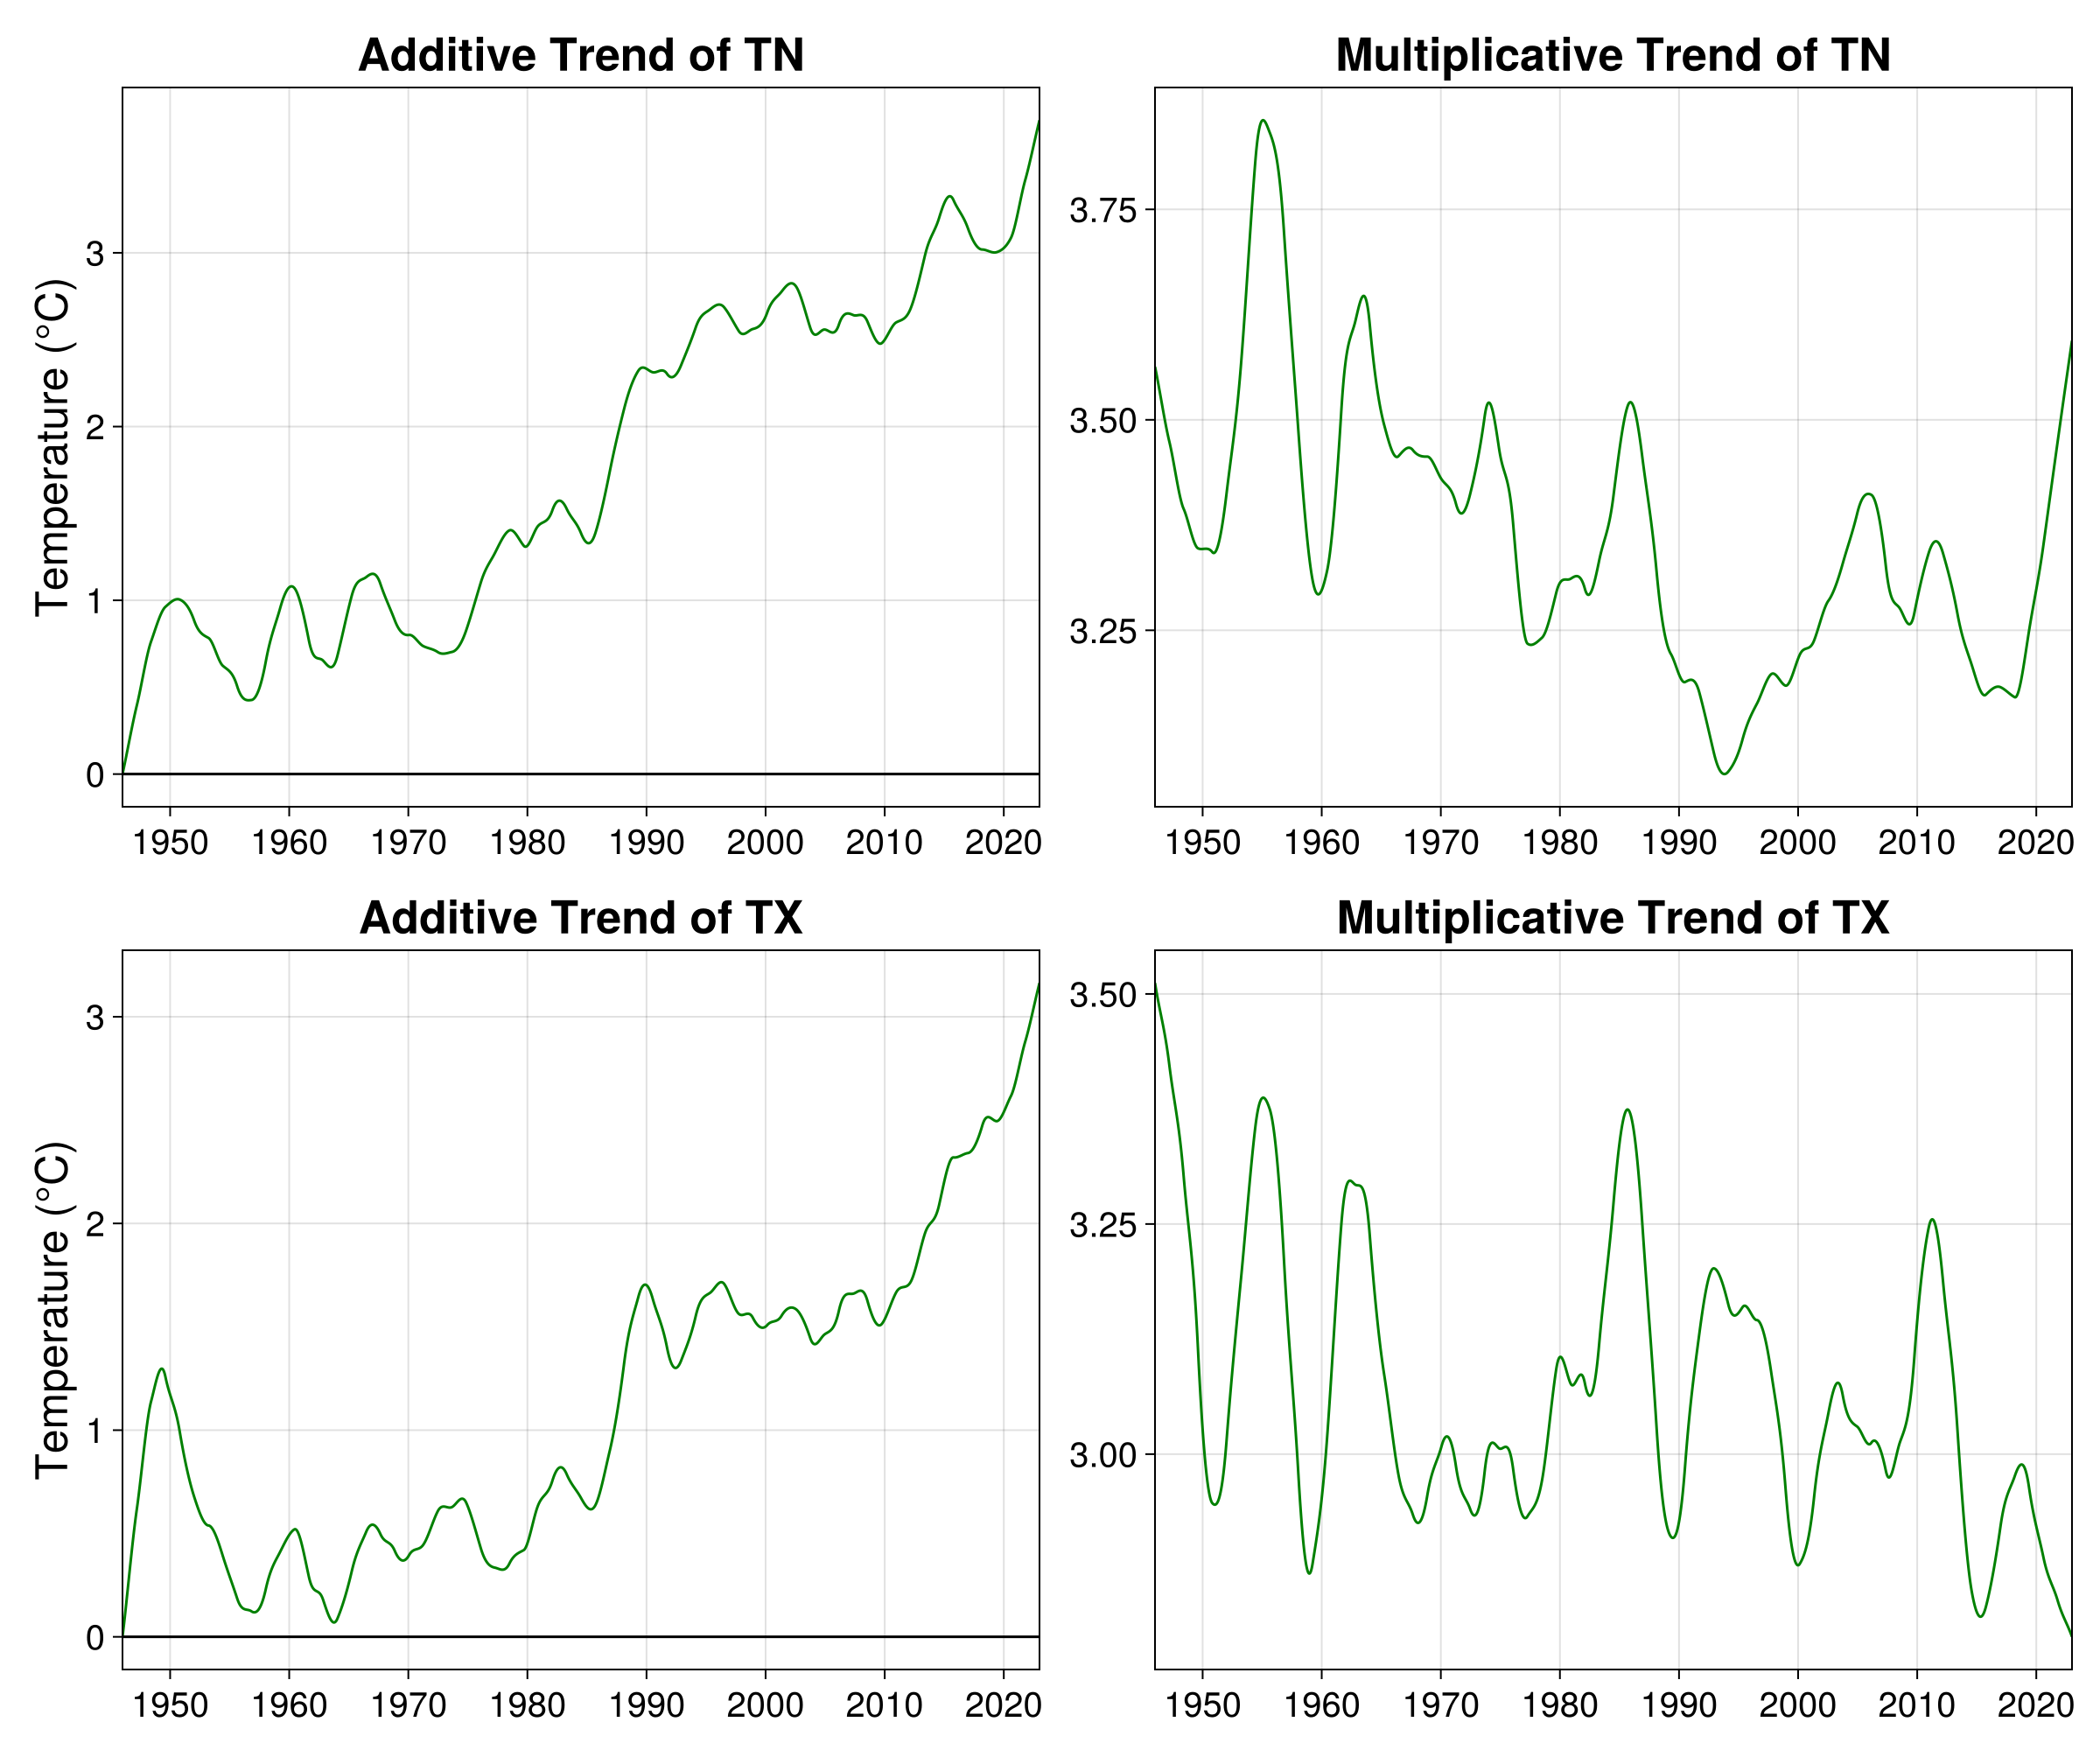

CairoMakie.Screen{IMAGE}


In [20]:
fig = Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB)
save("Presentation/GrapeSim/GRiskMontpellier.pdf", fig, ; px_per_unit=2.0)
display(fig)
display(PlotTrend(ARmodel))

Bonn

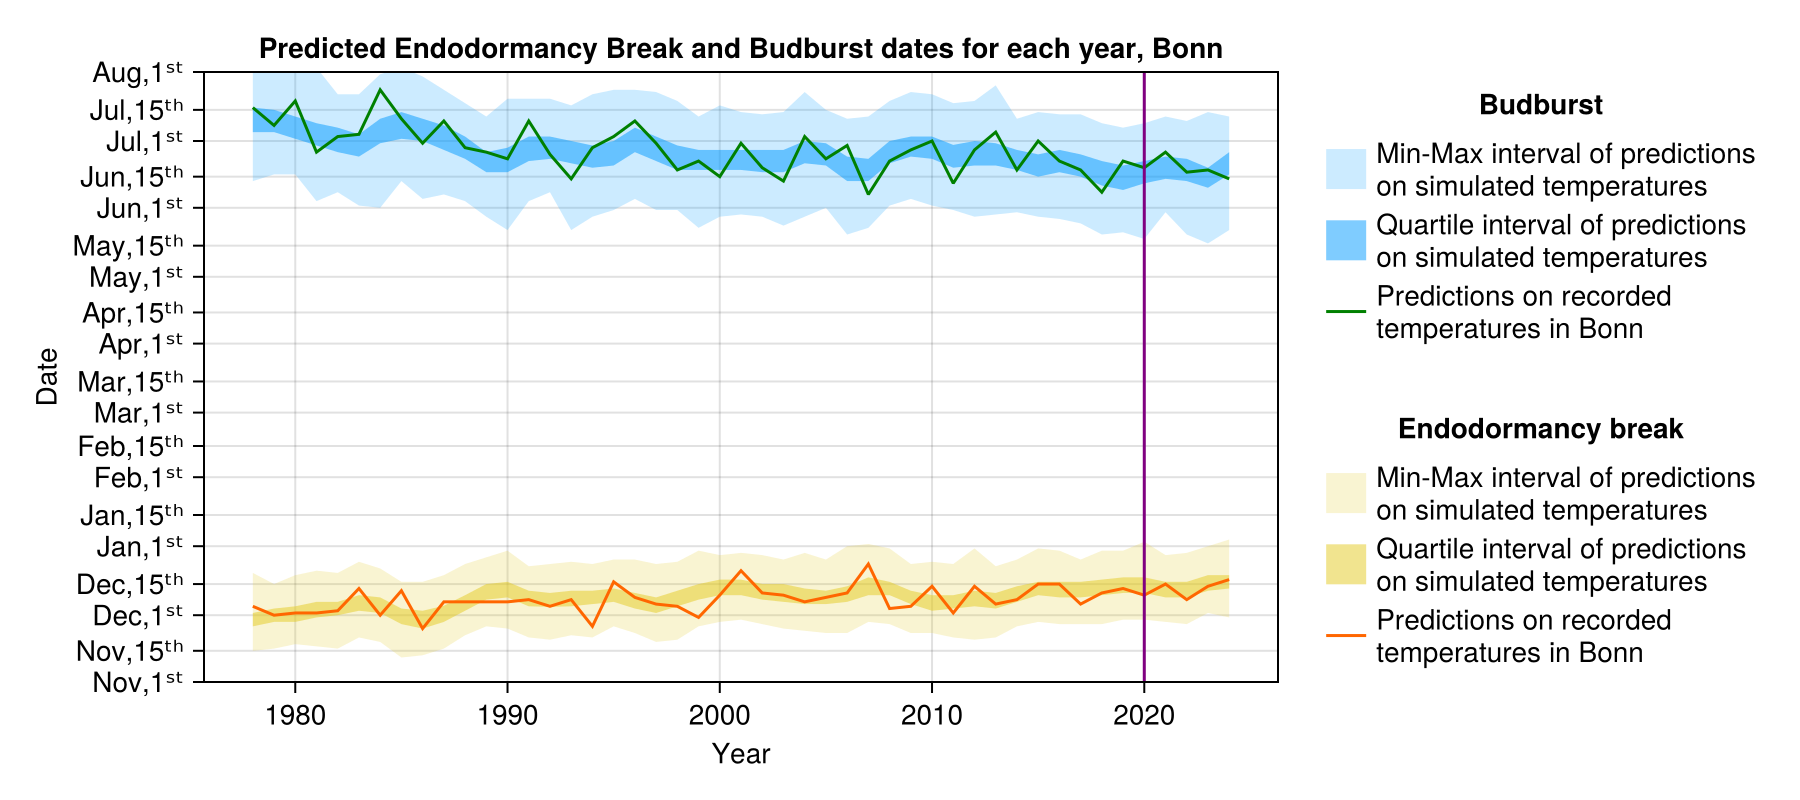

CairoMakie.Screen{PDF}


In [21]:
include("PhenoPlot.jl")
cd(@__DIR__)

DB_Bonn, BB_Bonn = Vine_Phenology_Pred(commonpath * "TN_Bonn.txt", commonpath * "TX_Bonn.txt")

ARmodel = load_model("modelBonnTN_TX_p5_k3.jld2")
date_vec = ARmodel.date_vec
x_vec = rand(ARmodel, 1000, date_vec)

Tab = [Vine_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Bonn, BB_Bonn, (8, 1),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Bonn",
    YearCut=2020
)
display(fig)
save("Presentation/GrapeSim/GBonn_sim.pdf", fig, ; px_per_unit=2.0)


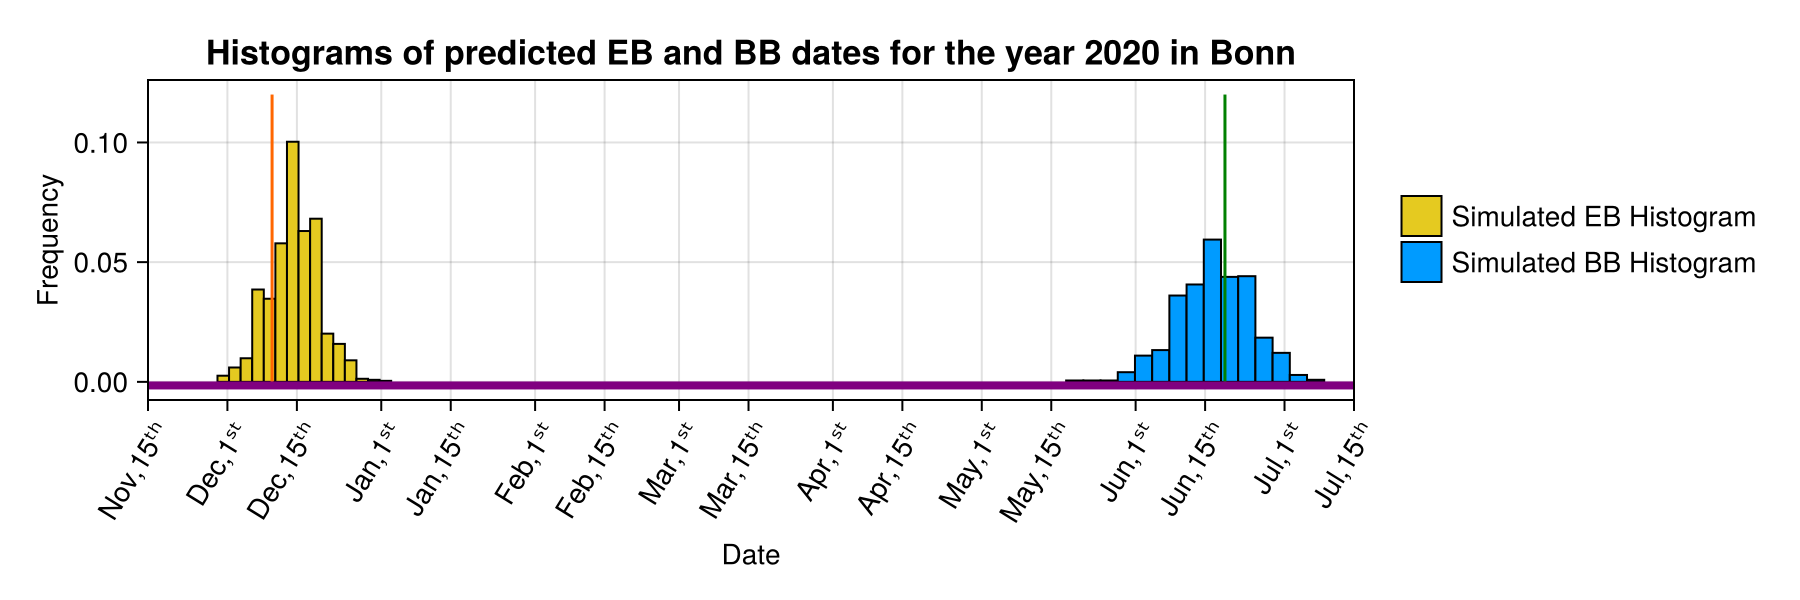

CairoMakie.Screen{PDF}


In [22]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Bonn, BB_Bonn, (8, 1), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Bonn",
    LineHeight=0.12
)
display(fig)
save("Presentation/GrapeSim/GBonn2020.pdf", fig, ; px_per_unit=2.0)

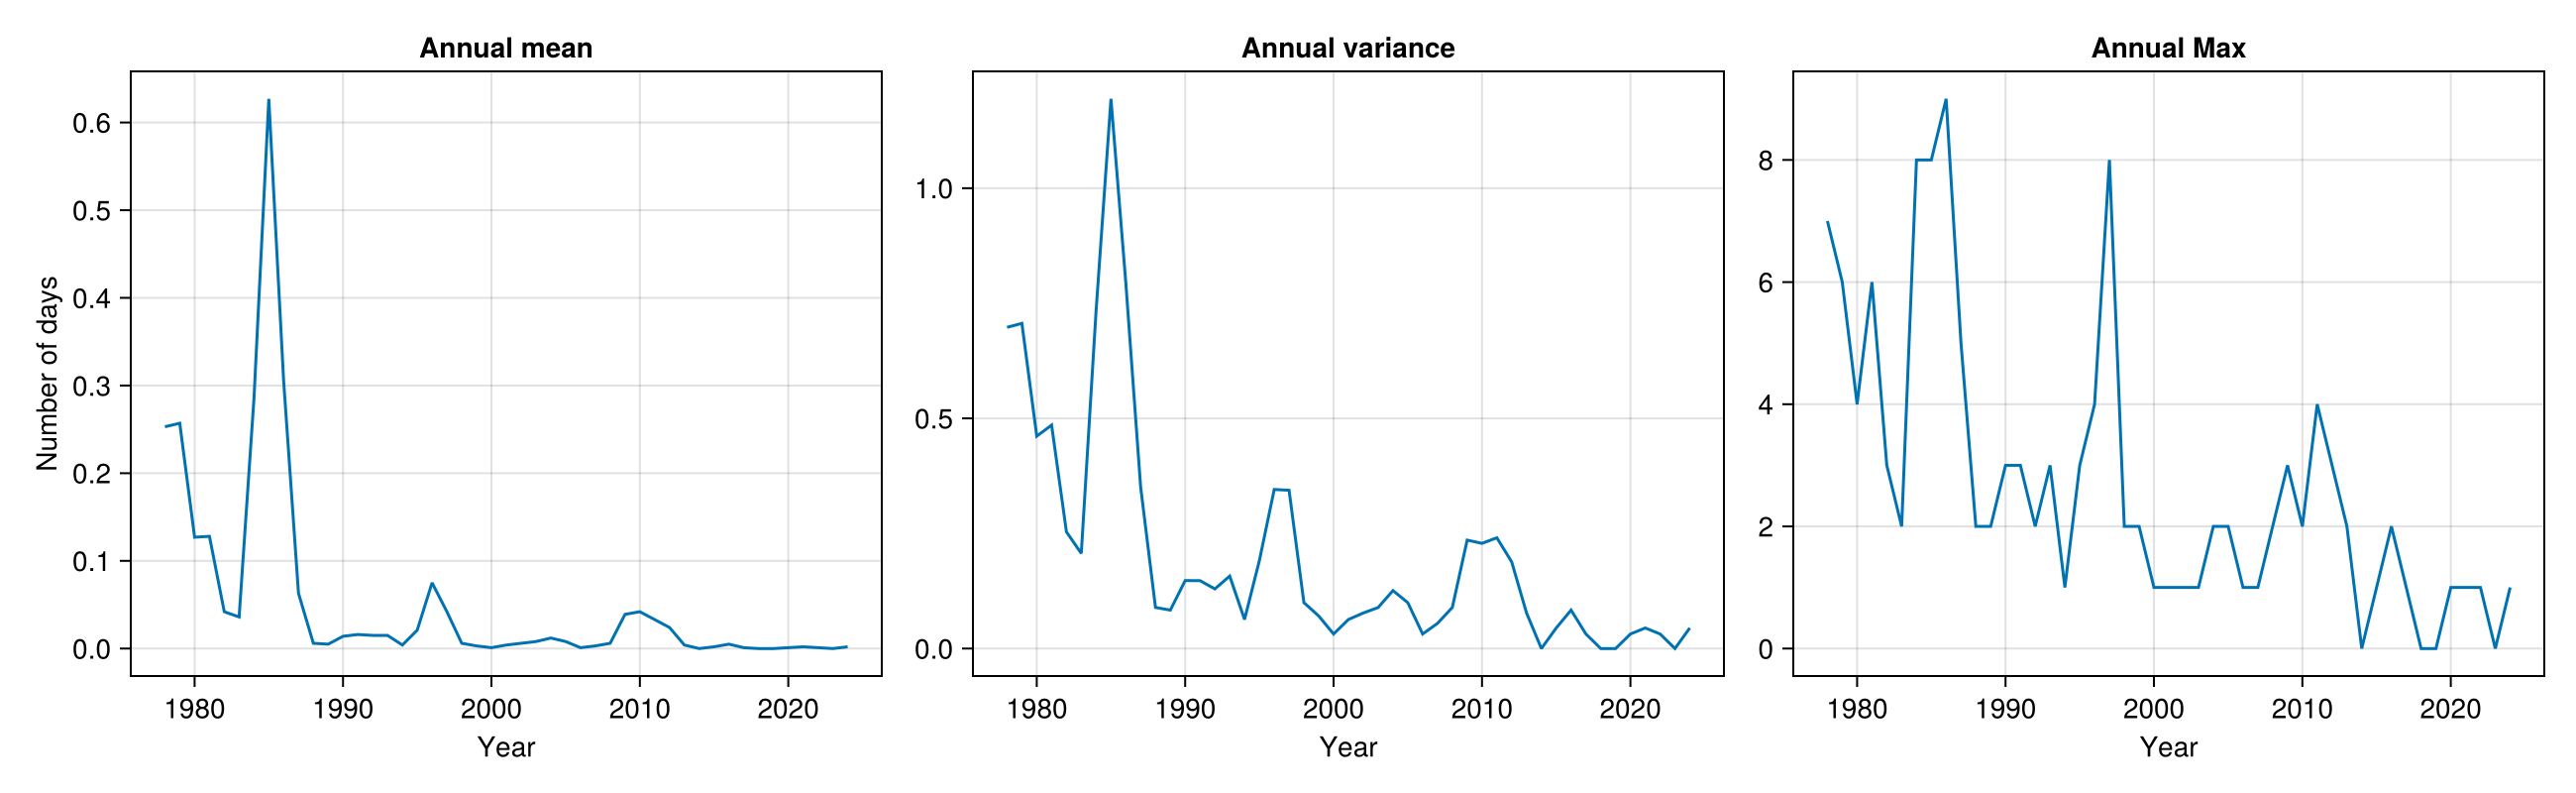

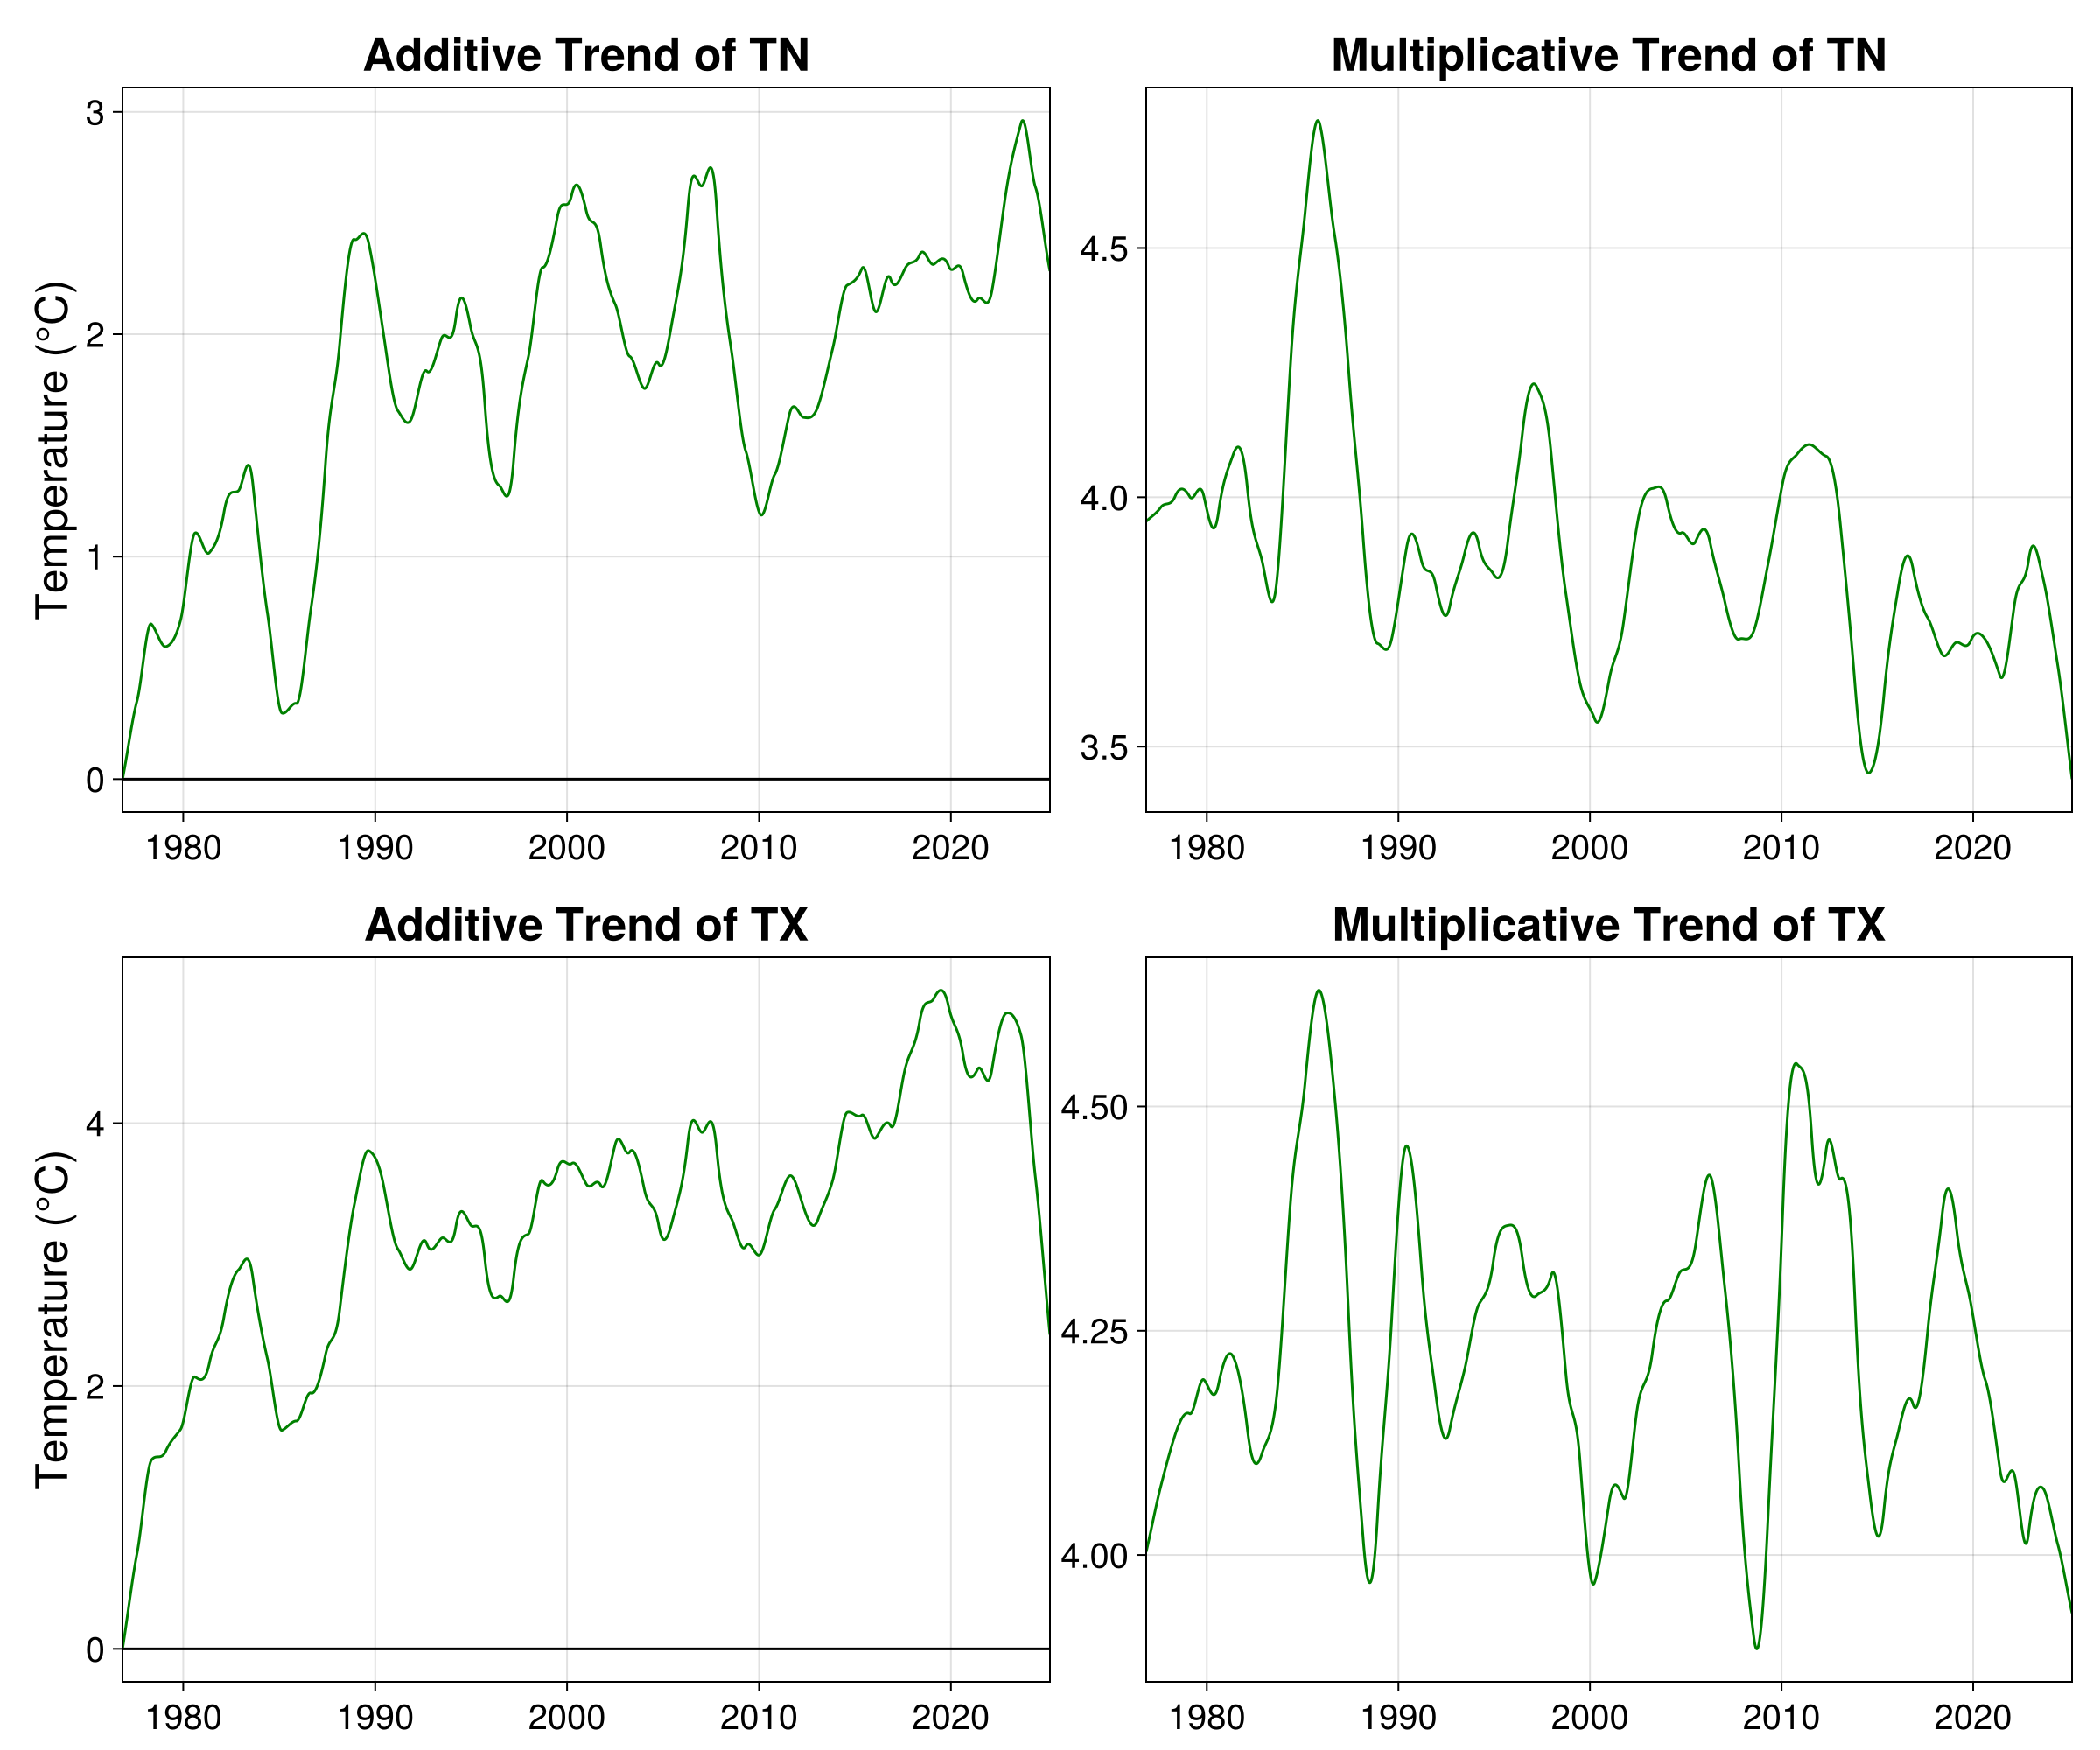

CairoMakie.Screen{IMAGE}


In [23]:
fig = Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB)
save("Presentation/GrapeSim/GRiskBonn.pdf", fig, ; px_per_unit=2.0)
display(fig)
display(PlotTrend(ARmodel))

Nantes

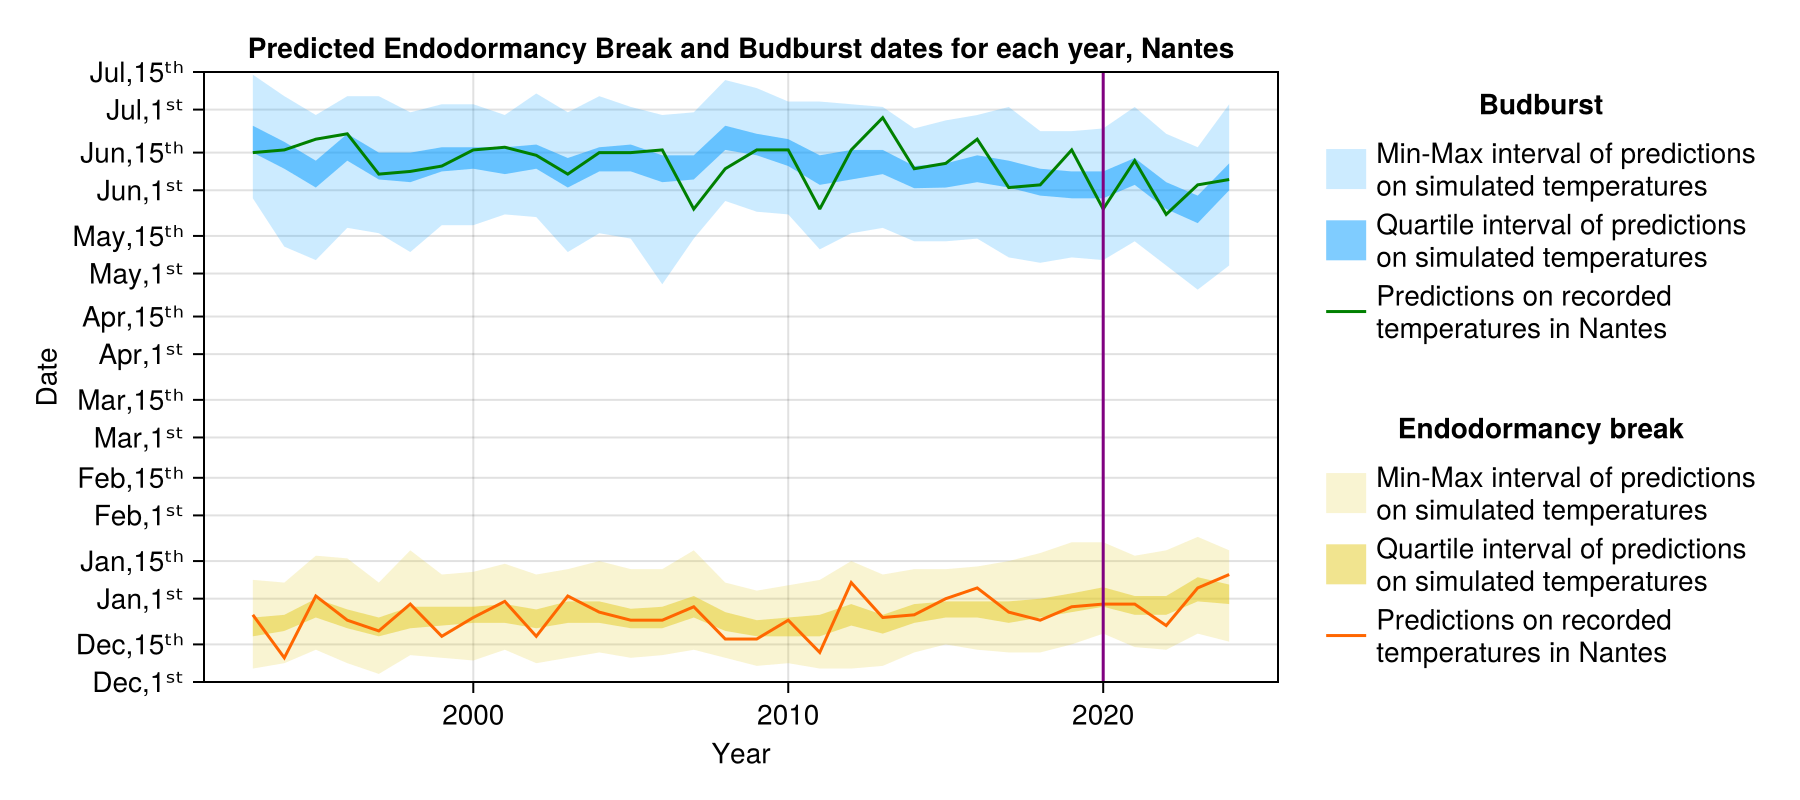

CairoMakie.Screen{PDF}


In [24]:
include("PhenoPlot.jl")

DB_Nantes, BB_Nantes = Vine_Phenology_Pred(commonpath * "TN_Nantes.txt", commonpath * "TX_Nantes.txt")

ARmodel = load_model("modelNantesTN_TX_p3_k4.jld2")
date_vec = ARmodel.date_vec
x_vec = rand(ARmodel, 1000, date_vec)

Tab = [Vine_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Nantes, BB_Nantes, (8, 1),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes",
    YearCut=2020,
    save_file = "GrapeSimNantes.jld2"
)
display(fig)
save("Presentation/GrapeSim/GNantes_sim.pdf", fig; px_per_unit=2.0)

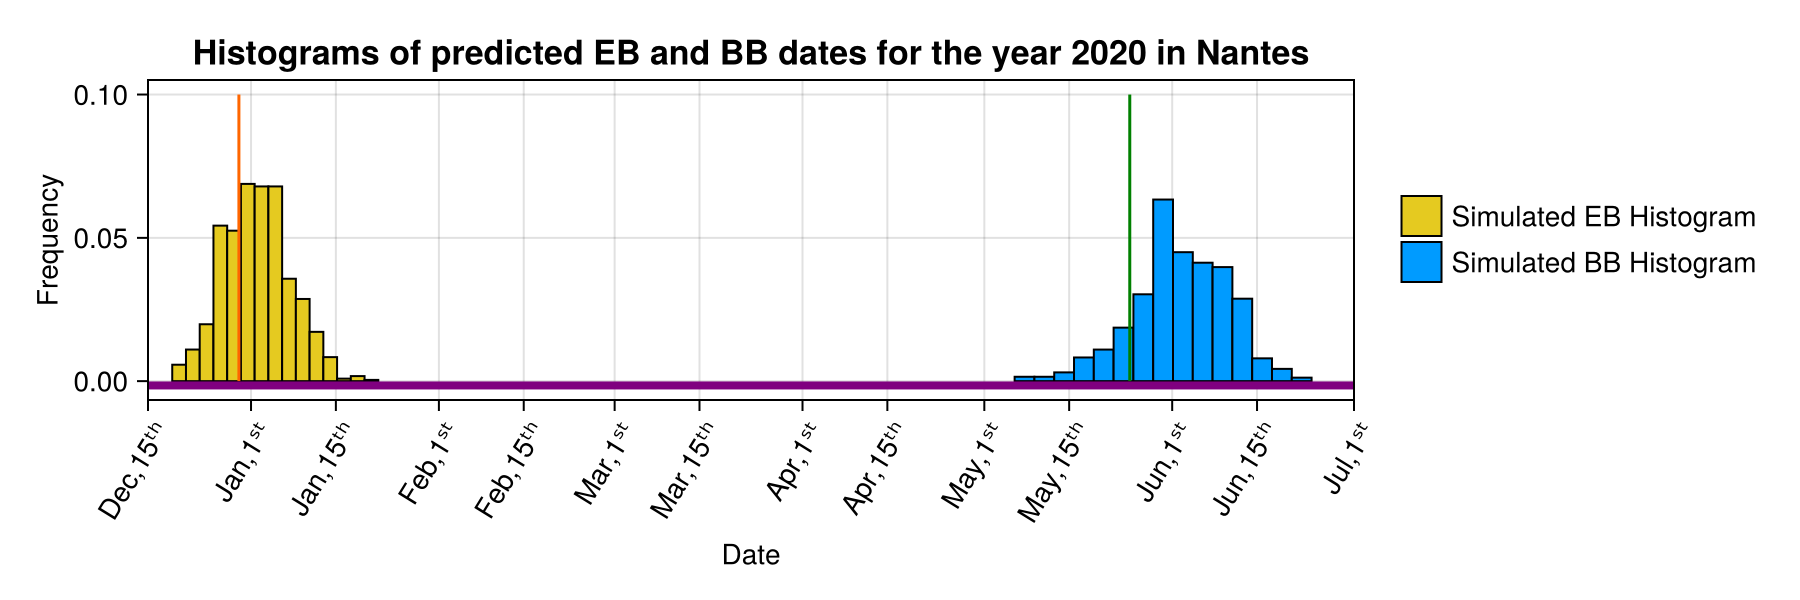

CairoMakie.Screen{PDF}


In [25]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Nantes, BB_Nantes, (8,1), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes",
    LineHeight=0.1
)
display(fig)
save("Presentation/GrapeSim/GNantes2020.pdf", fig, ; px_per_unit=2.0)

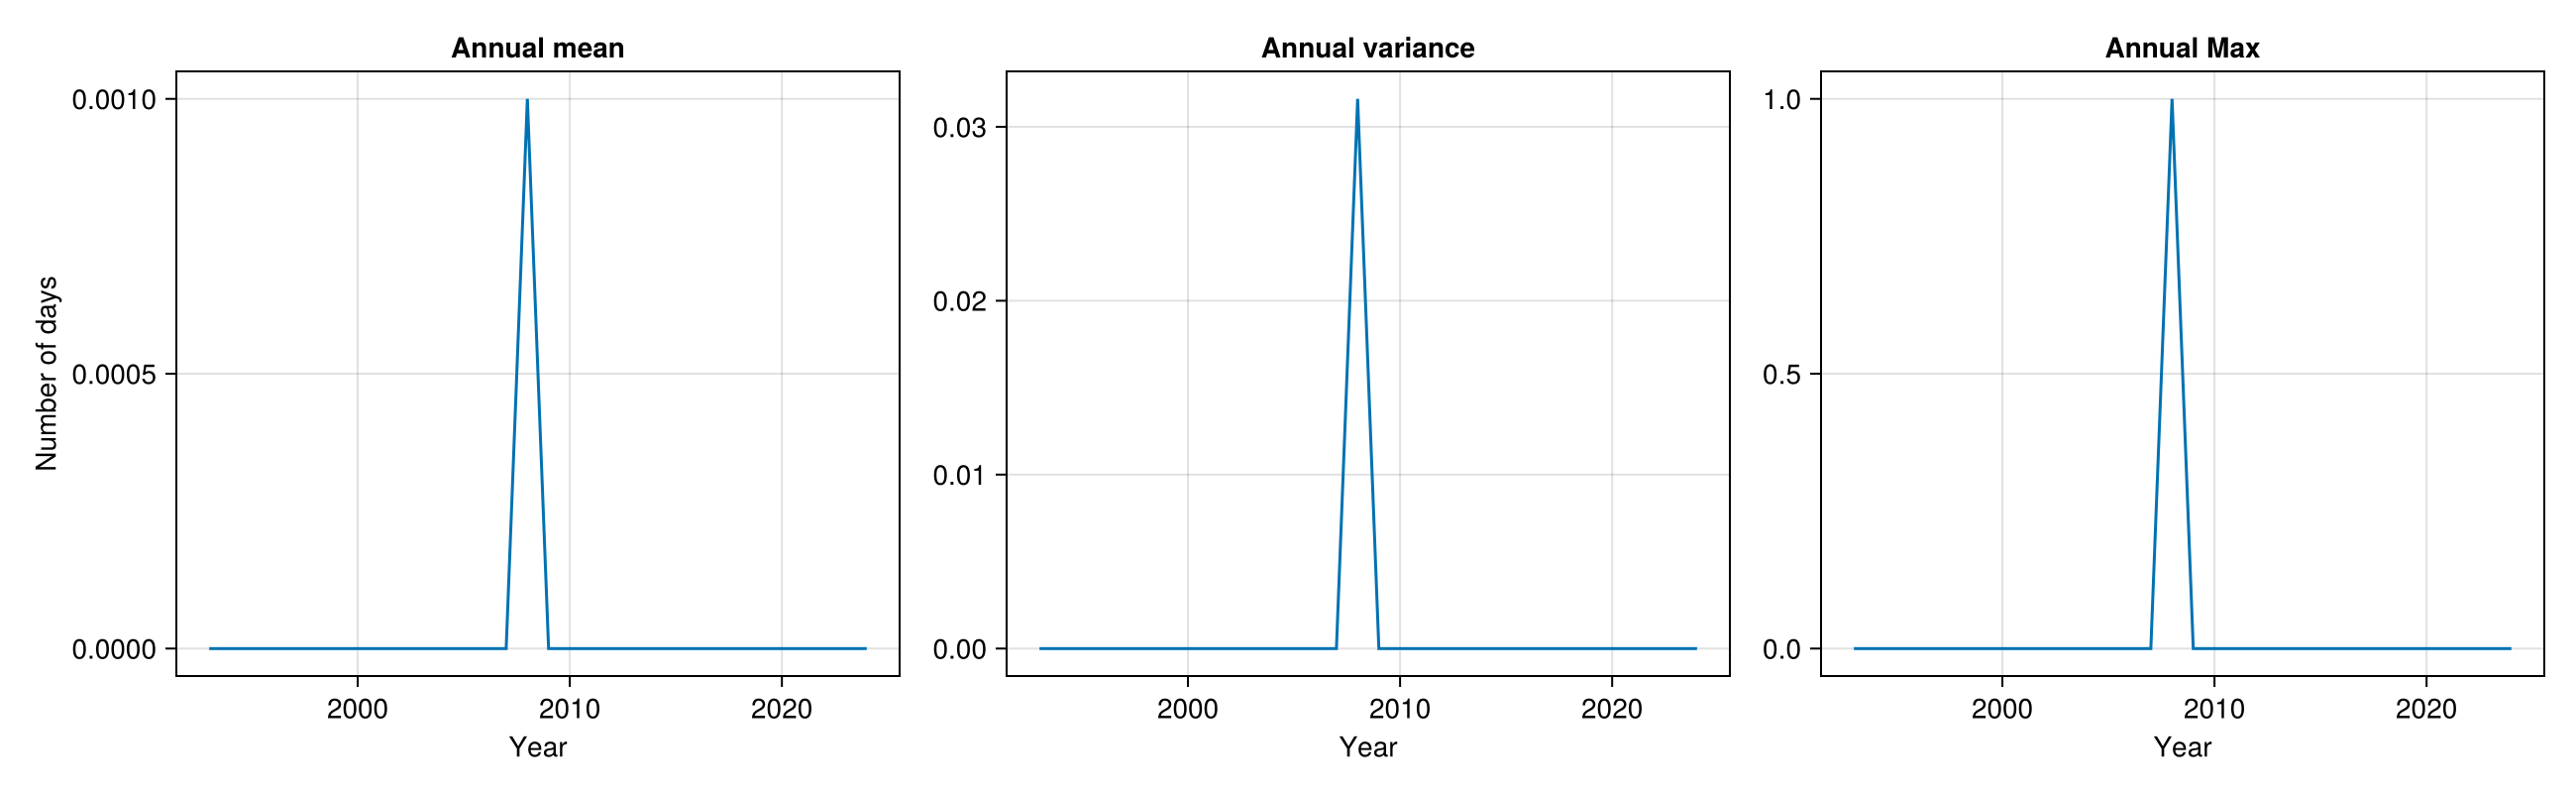

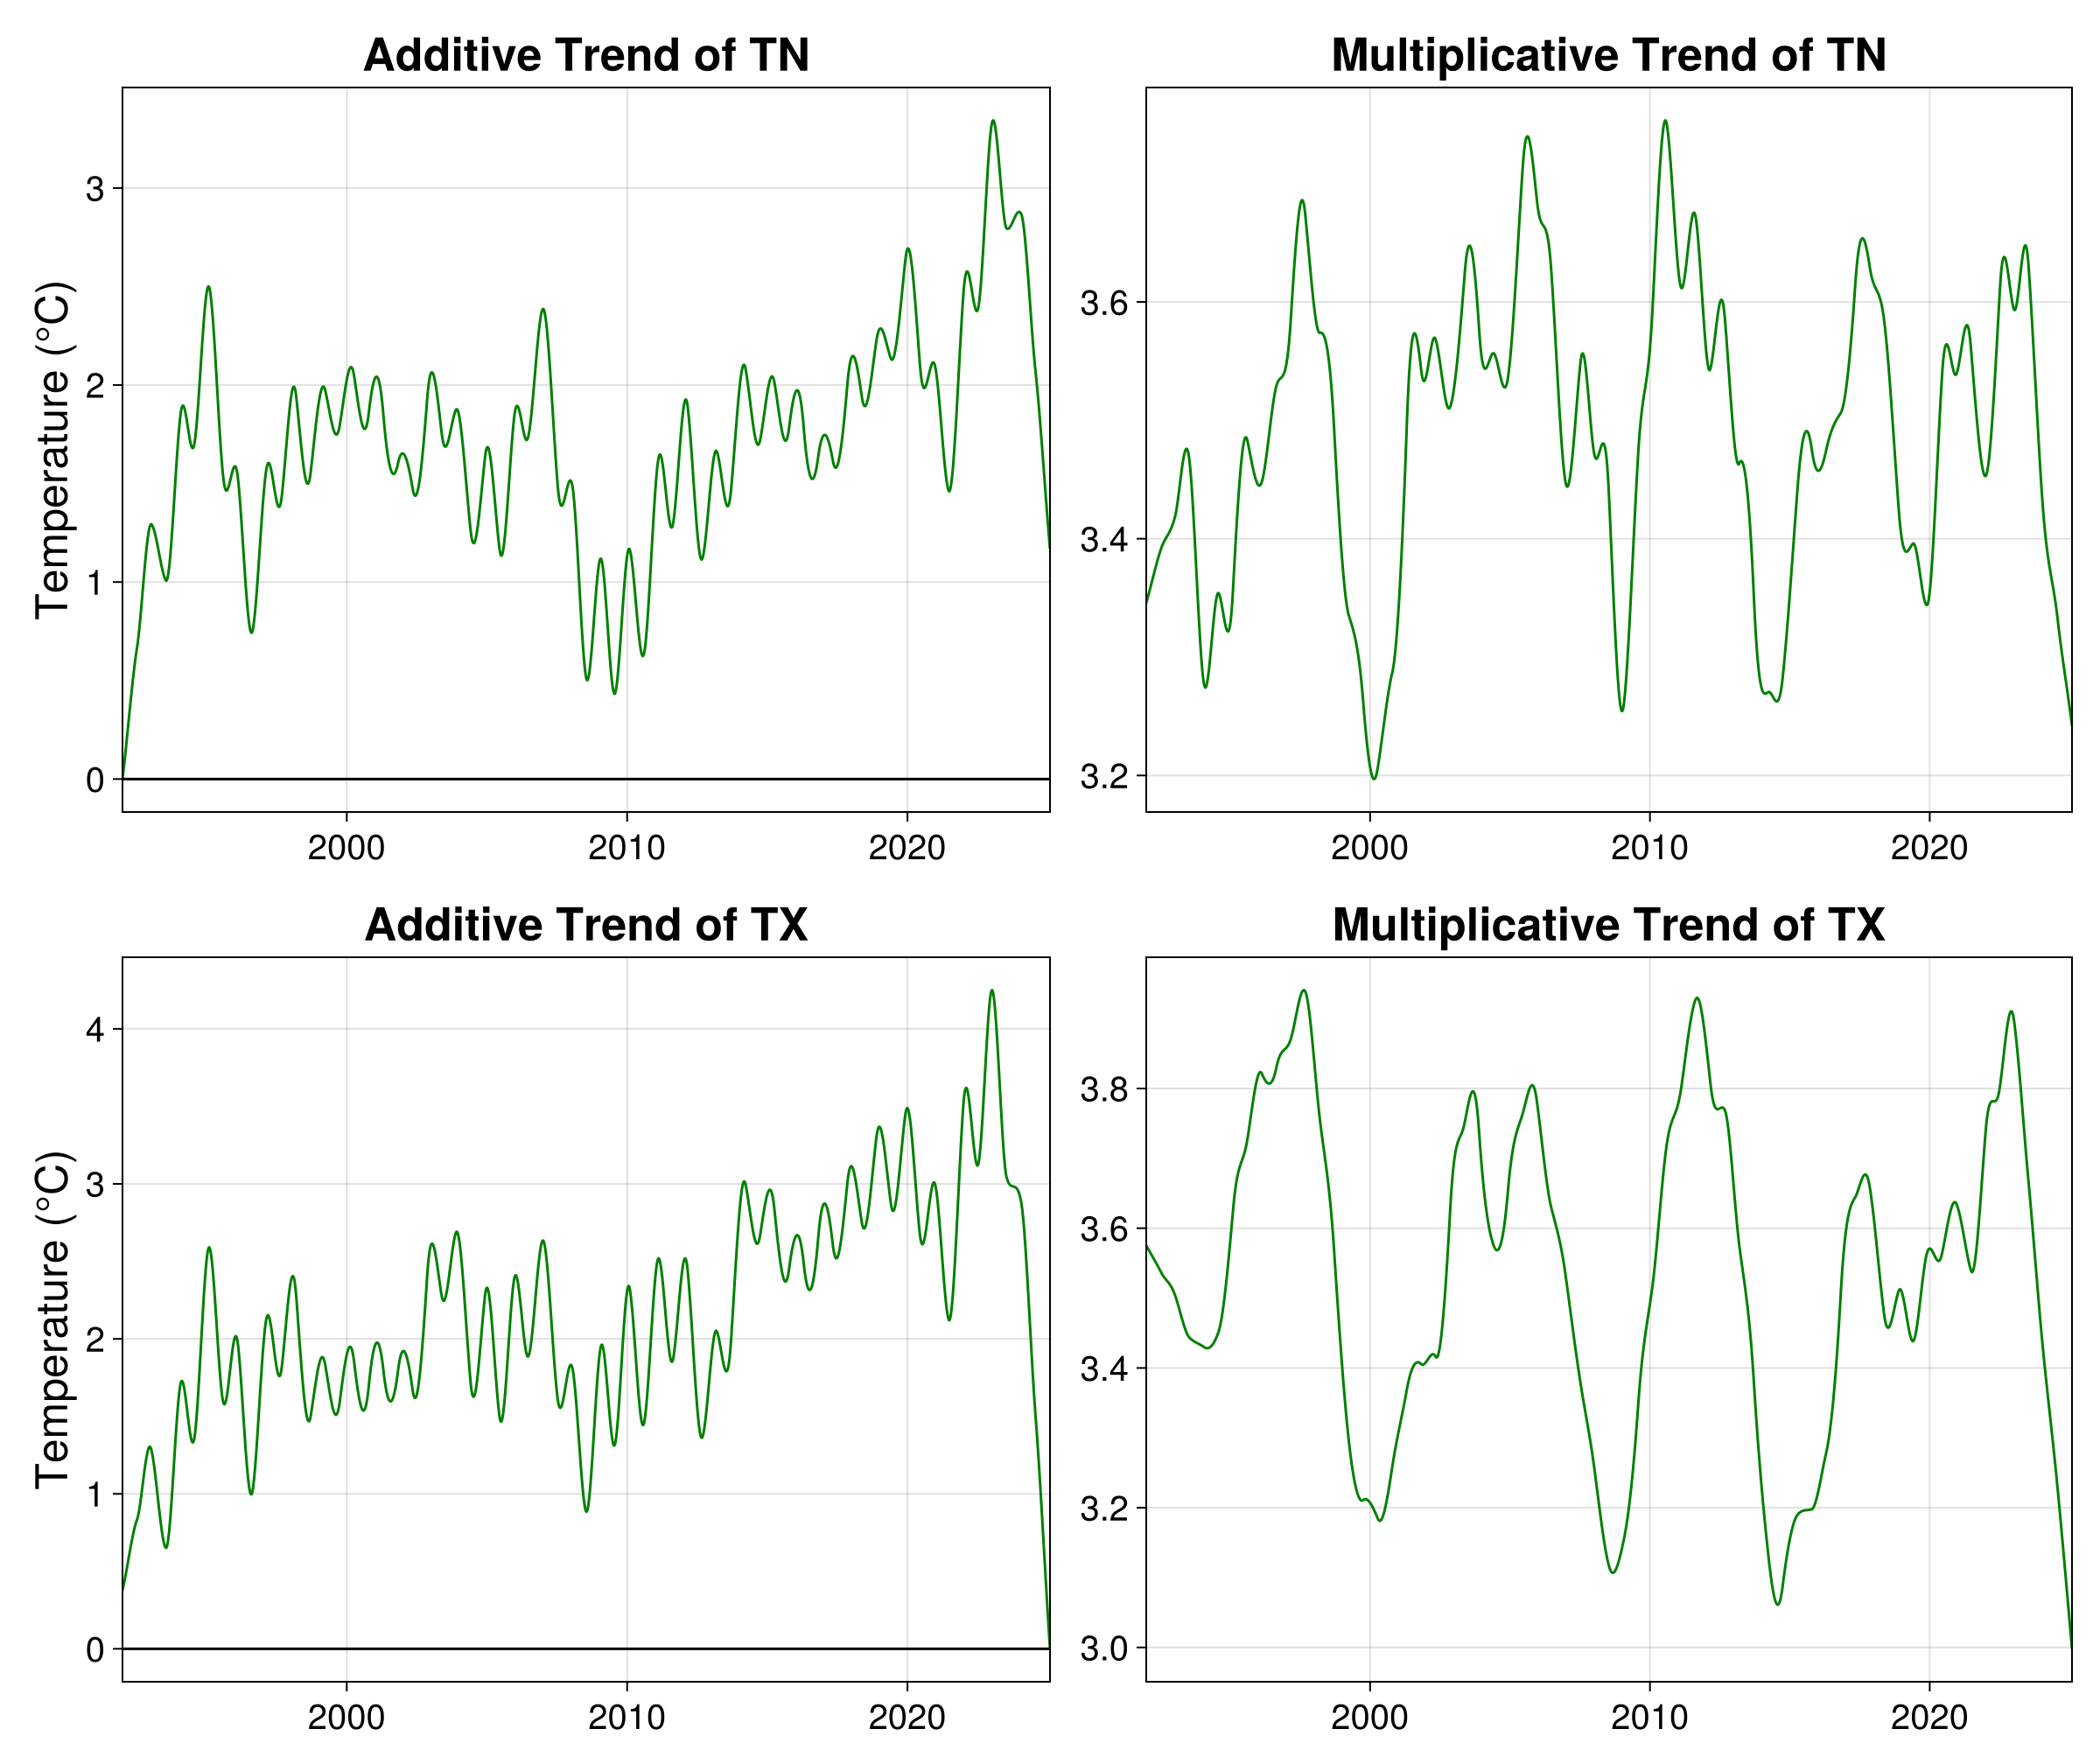

CairoMakie.Screen{IMAGE}


In [26]:
fig = Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB)
save("Presentation/GrapeSim/GRiskNantes.pdf", fig, ; px_per_unit=2.0)
display(fig)
display(PlotTrend(ARmodel))